In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

Data were simulated using a generative model

In [15]:
dat = pd.read_csv('sim_data_for_tsne.csv', usecols=range(8)[1:])

In [40]:
manifold = TSNE(random_state = 237, method = 'exact')

dims = ['X1', 'X2', 'X3', 'X4', 'X5']

coords_all = manifold.fit_transform(dat[dims])
coords_z1 = manifold.fit_transform(dat.loc[dat['z'] == 1, dims])

In [62]:
manifold = TSNE(random_state = 237, method = 'exact')

coords_weighted = manifold.fit_transform(dat[dims], weights = dat['weight'])

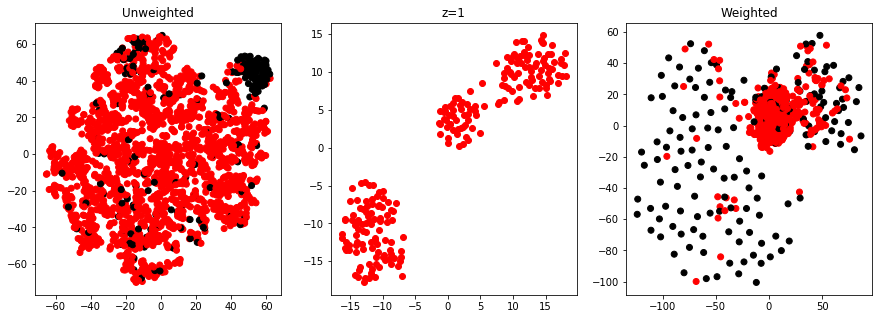

In [63]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

colors = np.where(dat['z'], ['black'], ['red'])
axs[0].scatter(coords_all[:,0], coords_all[:,1], color = colors)
axs[0].set_title('Unweighted')
axs[1].scatter(coords_z1[:,0], coords_z1[:,1], color = 'red')
axs[1].set_title('z=1')
axs[2].scatter(coords_weighted[:,0], coords_weighted[:,1], color = colors)
axs[2].set_title('Weighted')
plt.show()